<p dir="rtl"> توضیحات اولیه </p>

<p dir="rtl">
برای انجام پروژه 2 مدل متفاوت از CNN  شامل efficientnetB7  و sequential تست شده که هر دو مراحل آماده سازی دیتا متفاوتی دارند . هر دو مدل در کد موجود هست  اما روش ترجیحی مدل  sequential هست زیرا به عقیده بنده و با توجه به توضیحات قابل درک تر و دقیق تر است .
لازم به ذکر است این برای سزعت بیشتر این عملیات روی tpu  انجام شده . 
دیتاست ALASKA  شامل 4 پوشه با عکس های یکسان است که یک پوشه Cover  که عکس اصلی و بدون رمزنگاری است و سه پ.شه دیگر که هر کدام با روش رمزنگاری های متفاوت رمز شده اند و روش ها یه ترتیب JMIPOD ، JUNIWARD  و UERD  هست به علاوه پوشه تست برای پیش بینی که آیا رمز نگاری انجام شده است یا نه 
از آنجا که سیگنال استگو در ضرایب DCT  ذخیره می شوند من کسینوس شباهت و عدم شباهت را برای هر سه پوشه در عکس نشان دادم  و همچنین ماتریس DCT  را هم نشان دادم 

</p>

#import my dataset

<p dir="rtl" >دیتا ستی که برای این مثال ها استفاده شده را  دانلود و آنزیپ کردم . به این صورت که از حسابی که در سایت کگل داشتم یک ای پی ای ساختم و با استفاده از آن در این سایت احراز هویت کردم و دیتاست مسابقه آلاسکا را برای استفاده دانلود کردم .</p>




In [ ]:
! pip install kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=f6c0a29f879ec88ffa424cd0be9561f8e5005c3d42d7ffa1da67b8d3520cce11
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download alaska2-image-steganalysis

100% 30.0G/30.0G [10:22<00:00, 104MB/s]
100% 30.0G/30.0G [10:22<00:00, 51.7MB/s]


In [ ]:
!kaggle competitions download -c alaska2-image-steganalysis

alaska2-image-steganalysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: UERD/74675.jpg          
  inflating: UERD/74676.jpg          
  inflating: UERD/74677.jpg          
  inflating: UERD/74678.jpg          
  inflating: UERD/74680.jpg          
  inflating: UERD/74681.jpg          
  inflating: UERD/74682.jpg          
  inflating: UERD/74683.jpg          
  inflating: UERD/74684.jpg          
  inflating: UERD/74685.jpg          
  inflating: UERD/74686.jpg          
  inflating: UERD/74687.jpg          
  inflating: UERD/74688.jpg          
  inflating: UERD/74689.jpg          
  inflating: UERD/74690.jpg          
  inflating: UERD/74691.jpg          
  inflating: UERD/74692.jpg          
  inflating: UERD/74693.jpg          
  inflating: UERD/74694.jpg          
  inflating: UERD/74695.jpg          
  inflating: UERD/74696.jpg          
  inflating: UERD/74697.jpg          
  inflating: UERD/74698.jpg          
  inflating: UERD/74699.jpg          
  inflating: UERD/74700.jpg          

#Understanding of Steganalysis and dct 

<p dir="rtl" >در این قسمت به مفهوم اینکه دقیقا steganalysis  چیست و تفریف dct  می پردازیم </p>



import libraries 

In [ ]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.image as mpimg

%matplotlib inline

the address of files 

<p dir="rtl" >آدرس دو تا عکس که یکی رمز نشده و دیگری رمز شده  قرار دادم تا بعدا از آن برای نشان دادن خود عکس و نمایش ماتریس dct  استفاد شود </p>

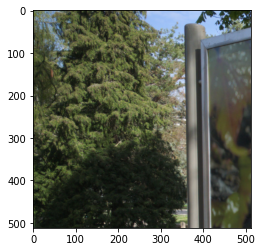

In [ ]:
cover = '/content/Cover/00001.jpg'
JMiPOD = '/content/JMiPOD/00001.jpg'
img = mpimg.imread(cover)
plt.imshow(img)


<p dir="rtl" > با استفاده از image.shape  میتوان ابعاد عکس را محاسبه کرد</p>

<p dir="rtl" > از خروجی میتوان متوجه شد که عکس طوا و عرضی برابر با 512 پیکسل دارد و همچنین 3 کانال رنگی دارد </p>

<p dir="rtl">
یک تصویر RGB به شکل یک آرایه شمارش 3 بعدی ذخیره می شود که در آن هر ابعاد دارای پیکسل هایی از رنگ های قرمز ، سبز و آبی است. مقادیر موجود در این عدد بین 0 تا 255 متغیر است. 
</p>

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# The 8 x 8 DCT matrix thus looks like this.
N = 8
dct = np.zeros((N, N))
for x in range(N):
    dct[0,x] = sqrt(2.0/N) / sqrt(2.0)
for u in range(1,N):
    for x in range(N):
        dct[u,x] = sqrt(2.0/N) * cos((pi/N) * u * (x + 0.5) )
        
np.set_printoptions(precision=3)
dct

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
       [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
       [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
       [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
       [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

In [ ]:
tiny = img[40:48, 40:48, 0]    # a tiny 8 x 8 block, in the color=0 (Red) channel

In [ ]:
dct_transpose = dct.transpose()
dct_transpose

array([[ 0.354,  0.49 ,  0.462,  0.416,  0.354,  0.278,  0.191,  0.098],
       [ 0.354,  0.416,  0.191, -0.098, -0.354, -0.49 , -0.462, -0.278],
       [ 0.354,  0.278, -0.191, -0.49 , -0.354,  0.098,  0.462,  0.416],
       [ 0.354,  0.098, -0.462, -0.278,  0.354,  0.416, -0.191, -0.49 ],
       [ 0.354, -0.098, -0.462,  0.278,  0.354, -0.416, -0.191,  0.49 ],
       [ 0.354, -0.278, -0.191,  0.49 , -0.354, -0.098,  0.462, -0.416],
       [ 0.354, -0.416,  0.191,  0.098, -0.354,  0.49 , -0.462,  0.278],
       [ 0.354, -0.49 ,  0.462, -0.416,  0.354, -0.278,  0.191, -0.098]])

In [ ]:
def doDCT(grid):
    return dot(dot(dct, grid), dct_transpose)

def undoDCT(grid):
    return dot(dot(dct_transpose, grid), dct)

# test : do DCT, then undo DCT; should get back the same image.
tiny_do = doDCT(tiny)
print(tiny_do)

[[ 9.707e+02  9.752e+01 -7.546e+01  2.317e+01 -5.000e+00 -3.351e-01
   9.881e+00  9.429e-01]
 [ 4.959e+01 -3.741e+01  2.680e+01  3.740e+00 -3.957e+00  1.207e+01
  -7.750e-01 -3.980e-01]
 [ 1.562e+01 -3.715e+00  1.548e+01 -5.401e+00  9.239e-01  5.915e-01
  -7.286e-01 -3.886e-03]
 [ 6.496e+00 -1.506e+01 -8.390e+00 -3.171e-01  8.704e+00 -5.127e-01
  -8.790e-01 -3.786e-01]
 [-4.250e+00 -7.989e+00  6.022e+00  1.088e+01  5.000e-01 -2.609e-01
  -1.141e+00 -4.542e-02]
 [ 2.619e-01  6.402e+00 -1.074e+01  9.747e-01  8.229e-01  5.251e-01
   1.426e-01  3.797e-01]
 [-9.987e+00  7.680e-01  2.145e-02 -7.725e-02 -3.827e-01  7.741e-02
   2.736e-01 -9.084e-01]
 [-4.435e-01  5.894e-01  1.174e+00 -5.165e-01  3.871e-01  2.168e-01
  -6.409e-03  1.205e+00]]


In [ ]:
import scipy                        # for cosine similarity
from scipy import fftpack           # for DCT

In [ ]:
# Define 2D DCT
def dct2(a):
    # Return the Discrete Cosine Transform of arbitrary type sequence x.
    return fftpack.dct(fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho')

# Perform a blockwise DCT
imsize = img.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( img[i:(i+8),j:(j+8)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


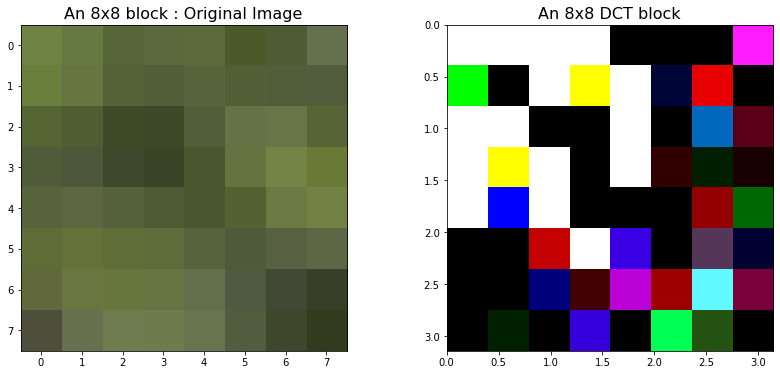

In [ ]:
pos = 128   # can be changed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Display original
ax1.imshow(img[pos:pos+8,pos:pos+8],cmap='gray')
ax1.set_title("An 8x8 block : Original Image", fontsize=16)

# Display the dct of that block
ax2.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
ax2.set_title("An 8x8 DCT block", fontsize = 16);

All dct blocks 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


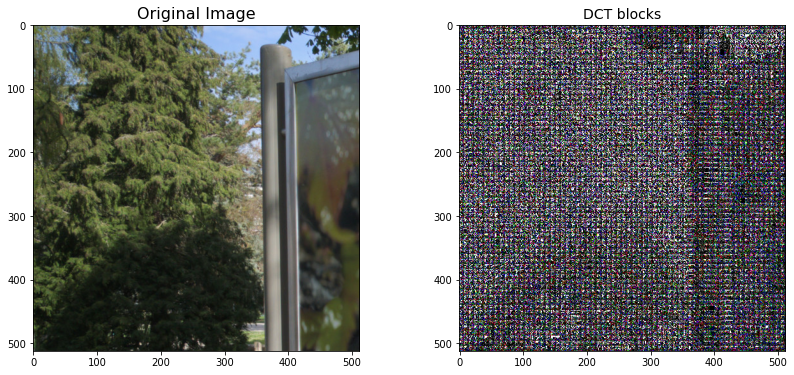

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original image
ax1.imshow(img);
ax1.set_title("Original Image", fontsize = 16);

# DCT Blocks
ax2.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
ax2.set_title("DCT blocks", fontsize = 14);

 DCT Threshold

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 13.814% of the DCT coefficients


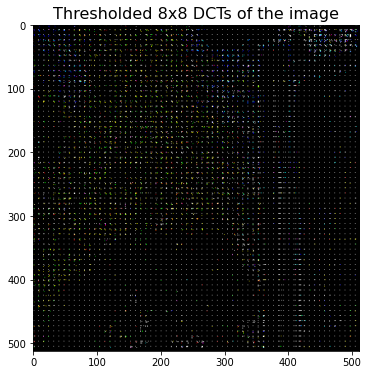

In [ ]:
# Threshold
thresh = 0.02
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure(figsize=(14, 6))
plt.imshow(dct_thresh, cmap='gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title("Thresholded 8x8 DCTs of the image", fontsize = 16)

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only {}% of the DCT coefficients".format(round(percent_nonzeros*100.0, 3)))

<p dir="rtl">
ما می توانیم شباهت کسینوس را بین دو بردار تصویر معمولی و تصویر رمزگذاری شده  با هر سه روش را پیدا کنیم ، اگر آنها شبیه هم باشند ، شباهت کسینوس (شباهت 1) باید یکی دیگر باشد ، کمتر از 1 خواهد بود و ما می توانیم تصور کنیم که چیزی اشتباه است
</p>


Similarity

In [ ]:
cover_img = '/content/Cover/00001.jpg'
JMiPOD_img = '/content/JMiPOD/00001.jpg'
JUNIWARD_img = '/content/JUNIWARD/00001.jpg'
UERD_img = '/content/UERD/00001.jpg'


cover = mpimg.imread(cover_img)
JMiPOD = mpimg.imread(JMiPOD_img)
JUNIWARD = mpimg.imread(JUNIWARD_img)
UERD = mpimg.imread(UERD_img)

In [ ]:
shape = (512*512*3)
vec_cover = np.reshape(cover,shape)
vec_JMiPOD = np.reshape(JMiPOD,shape)
vec_JUNIWARD = np.reshape(JUNIWARD,shape)
vec_UERD = np.reshape(UERD,shape)

cosine similarity

<p dir="rtl">
شباهت کسینوس برای بردارهای یکسان 1 است
</p>
<p dir="rtl">
هر چهار خالت محاسبه شده است  که یک خالت شابهت عکس رمز نشده با خودش است ، واضح است که برابر یک خواهد بود و دیگری شیباهت عکس رمز نشده با سه روش های JMiPOD,JUNIWARD و UERD  است که تا حد بسیار بالایی شبیه هستند.
</p>


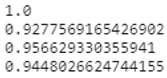

In [ ]:
from scipy import spatial

In [ ]:
print(1 - spatial.distance.cosine(vec_cover,vec_cover))
print(1 - spatial.distance.cosine(vec_cover,vec_JMiPOD))
print(1 - spatial.distance.cosine(vec_cover,vec_JUNIWARD))
print(1 - spatial.distance.cosine(vec_cover,vec_UERD))

1.0
1.0722430834573098
1.043370669644059
1.0551973375255845


cosin Disimilarity

<p dir="rtl">
تفاوت کسینوس برای بردارهای یکسان 1 است
</p>
<p dir="rtl">
هر چهار خالت محاسبه شده است  که یک خالت تفاوت عکس رمز نشده با خودش است ، واضح است که برابر صفر خواهد بود و دیگری تفاوت عکس رمز نشده با سه روش های JMiPOD,JUNIWARD و UERD  است که تا حد بسیار کمی متفاوت هستند.
</p>

In [ ]:
print(spatial.distance.cosine(vec_cover,vec_cover))
print(spatial.distance.cosine(vec_cover,vec_JMiPOD))
print(spatial.distance.cosine(vec_cover,vec_JUNIWARD))
print(spatial.distance.cosine(vec_cover,vec_UERD))

0.0
-0.07224308345730979
-0.043370669644059
-0.05519733752558453


# import libraries for trainig

In [ ]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp37-cp37m-linux_x86_64.whl

     |████████████████████████████████| 133.6 MB 59 kB/s 
     |████████████████████████████████| 57 kB 2.9 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.278 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.8.0 which is incompatible.


In [ ]:
!pip install tensorflow

In [ ]:
!pip install albumentations==0.4.6
import albumentations

     |████████████████████████████████| 117 kB 5.5 MB/s 
     |████████████████████████████████| 948 kB 28.1 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=ff595213f7316c407f44a85a472d8d8471a7655be380be0ed7f021fa3b50b210
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [ ]:
import os
import gc
import cv2
import sys
import time
# from colorama import Fore

import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

import torch
import torch.nn as nn
from torch.optim import Adam
from torch import FloatTensor, LongTensor
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# import torch_xla.core.xla_model as xm
# import torch_xla.distributed.parallel_loader as pl
# import torch_xla.distributed.xla_multiprocessing as xmp

# from efficientnet_pytorch import EfficientNet
from albumentations import Normalize, VerticalFlip, HorizontalFlip, Compose

# Data Augmentation for Image Preprocessing
from albumentations import (ToFloat, Normalize, VerticalFlip, HorizontalFlip, Compose, Resize,
                            RandomBrightness, RandomContrast, HueSaturationValue, Blur, GaussNoise)

import random
from random import shuffle
import tensorflow as tf

import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as l
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import efficientnet.tfkeras as efn
from sklearn.model_selection import train_test_split
# from kaggle_datasets import KaggleDatasets
from PIL import Image

import matplotlib.image as mpimg
from scipy import spatial

set seeds

<p dir="rtl">
seed به معنای حالت تثبیت کننده یک شبه مولد اعداد تصادفی است. اگر از همان دانه استفاده کنید ، دقیقاً الگوی یکسانی از اعداد را دریافت خواهید کرد. این بدان معناست که چه در حال انجام train test split ، ایجاد یک آرایه numpy  از توزیع تصادفی یا حتی نصب مدل ML باشید ، تنظیم seed بارها و بارها به شما مجموعه ای از نتایج یکسان را می دهد.
</p>

In [ ]:
def set_seed(seed = 42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
set_seed()

Tpu strategy

<p dir="rtl">
تشخیص سخت افزار ، بازگشت استراتژی توزیع مناسب
</p>

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()
    
    

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.95.80.114:8470
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.95.80.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.95.80.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
#-----dimension of  pictures-----------
height = 512
weight = 512
#--------------flip---------------------
verticalFlip = 0.0
horizentalFlip = 0.0
#---------------------------------------
epoches = 3
#lr stands for learning rate 
lr = 1e-4, 1e-3
batch_size = 8 * strategy.num_replicas_in_sync

print(strategy.num_replicas_in_sync)

8


# Load and prepare the data

<p dir="rtl">
در اینحا یک دیکشنری از تمام فولدر ها و اسم ها و آدرس هاشون درست کردم و در طول برنامه از آن ها استفاده خواهم کرد
</p>
<p dir="rtl">
os.listdir(data_path): لیستی از تمام فولدرها و فایل های موجود در این آدرس را برمی گرداند </p>


In [ ]:
model_path = 'efficientnet_model'
data_path ='/content'
sample_submission_path = data_path + 'sample_submission.csv'


classes = list(os.listdir(data_path))
path_dictionary={}
def create_paths():
    for filename in classes:
        if(filename == 'sample_submission.csv'):
             path_dictionary.update({f"{filename}":f"{data_path}/{filename}"})
        else:
            path_dictionary.update({f"{filename}":f"{data_path}/{filename}/"})

In [ ]:
create_paths()
print(path_dictionary)

{'.config': '/content/.config/', 'JUNIWARD': '/content/JUNIWARD/', 'sample_submission.csv': '/content/sample_submission.csv', 'Cover': '/content/Cover/', 'Test': '/content/Test/', 'JMiPOD': '/content/JMiPOD/', 'UERD': '/content/UERD/', 'kaggle.json': '/content/kaggle.json/', 'sample_data': '/content/sample_data/'}


<p dir="rtl">
train_path شامل آدرس تمتم فایل هایی است که در یادگیزی استفاده میشوند 
</p>

In [ ]:
train_paths = [path_dictionary['Cover'],path_dictionary['JMiPOD'], path_dictionary['JUNIWARD'], path_dictionary['UERD']]
class_labels = { name: i for i, name in enumerate(classes)}
print(class_labels)

{'.config': 0, 'JUNIWARD': 1, 'sample_submission.csv': 2, 'Cover': 3, 'Test': 4, 'JMiPOD': 5, 'UERD': 6, 'kaggle.json': 7, 'sample_data': 8}


In [ ]:
path_dictionary['sample_submission.csv']

'/content/sample_submission.csv'

In [ ]:
sample_submission = pd.read_csv(path_dictionary['sample_submission.csv'])

<p dir="rtl">
این فایل csv  شامل شماره عکس های پوشه تست است و نتایج بعد از predict درصد ها در این فایل نوشته خواهد شد.
</p>

In [ ]:
sample_submission.head()

,Id,Label
0,0001.jpg,0
1,0002.jpg,0
2,0003.jpg,0
3,0004.jpg,0
4,0005.jpg,0


In [ ]:
dataframe = pd.DataFrame({})
# classes = list(path_dictionary.keys())[2:5]
classes = ['Cover', 'UERD', 'JUNIWARD', 'JMiPOD']
print(classes)

['Cover', 'UERD', 'JUNIWARD', 'JMiPOD']


#Split data for test

In [ ]:
lists = []
cate = []
alaska = pd.DataFrame({})
#get filenames
for directory in classes:
    # file name
    list_ = os.listdir(path_dictionary[directory])
    lists = lists+list_
    # category name
    cate_ = np.tile(directory,len(list_))
    cate = np.concatenate([cate,cate_])
    
    print(directory)
    
#to dataframe
alaska["cate"] = cate
alaska["name"] = lists

Cover
UERD
JUNIWARD
JMiPOD


In [ ]:
#add path to df
alaska["path"] = [str(os.path.join('/content/',cate,name)) 
              for cate, name in zip(alaska["cate"], alaska["name"])]

#Labeling func
def cate_label(x):
    if x["cate"] == "Cover":
        res = 0
    else:
        res = 1
    return res

#Training & test sets
Test_df = alaska.query("cate=='Test'").sort_values(by="name")
Train_df = alaska.query("cate!='Test'")

#apply Labeling func
Train_df["labled"] = alaska.apply(cate_label, axis=1)

In [ ]:
display(alaska)

,cate,name,path
0,Cover,46309.jpg,/content/Cover/46309.jpg
1,Cover,72858.jpg,/content/Cover/72858.jpg
2,Cover,32446.jpg,/content/Cover/32446.jpg
3,Cover,76458.jpg,/content/Cover/76458.jpg
4,Cover,63070.jpg,/content/Cover/63070.jpg
...,...,...,...
299995,JMiPOD,26031.jpg,/content/JMiPOD/26031.jpg
299996,JMiPOD,00017.jpg,/content/JMiPOD/00017.jpg
299997,JMiPOD,50584.jpg,/content/JMiPOD/50584.jpg
299998,JMiPOD,01413.jpg,/content/JMiPOD/01413.jpg


In [ ]:
from numpy.random import RandomState
import pandas as pd

rng = RandomState()
test_samples = alaska.sample(frac=0.7, random_state=rng)

In [ ]:
display(test_samples)

,cate,name,path,split
40285,Cover,14592.jpg,/content/Cover/14592.jpg,-0.651045
278509,JMiPOD,53266.jpg,/content/JMiPOD/53266.jpg,0.126029
107992,UERD,57631.jpg,/content/UERD/57631.jpg,0.800530
168537,JUNIWARD,53598.jpg,/content/JUNIWARD/53598.jpg,-0.019054
154089,JUNIWARD,43546.jpg,/content/JUNIWARD/43546.jpg,0.911156
...,...,...,...,...
293889,JMiPOD,15848.jpg,/content/JMiPOD/15848.jpg,0.381748
188462,JUNIWARD,36888.jpg,/content/JUNIWARD/36888.jpg,-1.678347
7941,Cover,70977.jpg,/content/Cover/70977.jpg,0.211879
102190,UERD,70639.jpg,/content/UERD/70639.jpg,0.447119


# EfficeinetNetB7

<p dir="rtl">

</p>

<p dir="rtl">
متد decode_image  عکس رو با استفاده از کتابخانه تنسورفلو میخونه و بعد با همون کتابخانه دیکود میکنه بعد resize  رو انجام میده.
</p>
<p dir="rtl">
tf.decode_jpeg: رمزگشایی یک تصویر رمزگذاری شده با JPEG به یک تنسور uint8
<br>
channel تعداد کانال های رنگی برای رمزگشایی تصویر.
<br>
channels=3: خروجی تصویر RGB
</p>
<p dir="rtl">
تغییر اندازه
<br>
تغییر اندازه Ops تصاویر ورودی را به عنوان تنسورهای مختلف پذیرفته است. آنها همیشه تصاویر تغییر اندازه را به عنوان تنتور float32 خروجی می دهند.
<br>
تابع tf.image.resize از هر دو تنسور 4 بعدی و 3 بعدی به عنوان ورودی و خروجی پشتیبانی می کند. تنسورهای 4 بعدی برای دسته ای از تصاویر ، تنسورهای سه بعدی برای تصاویر جداگانه هستند.
<br>
درسته که همه  ی عکس ها ی ما 512 پیکسل اند اما باز نیازه که ریسایز کنیم ممکنه تو دیتاست ما عکسی  باشه که انداره  اش با بقیه عکس ها فرق کنه لازمه اون زو هم 512 کنیم.
</p>
<p dir="rtl">
تابع cast  میاد کل آزایه رو به 255 تقسیم میکته اینحوری به جای رنج 0 تا 255 محدوده ی 0 تا 1 خواهد بود و محاسبات راحت تر انحام میشه
</p>

In [ ]:
def decode_image(img, label=None, image_size=(weight,height)):
    bits = tf.io.read_file(img)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)/255.0   #in float representation the image range is [0.0, 1.0] and in int it is [0, 255]. In order to map 255 to 1.0 the normalization factor needs to be 255, not 256.
    image = tf.image.resize(image, image_size)
    return image

<p dir="rtl">
اینجا میاد دونه دونه فایل ها رو میخونه  و category ها رو از اسم فولدر برمیداره و با همه ی اینا یک dataframe  درست میکنه
</p>

In [ ]:
lists = []
cate = []

#get filenames
for directory in classes:
    # file name
    list_ = os.listdir(path_dictionary[directory])
    lists = lists+list_
    # category name
    cate_ = np.tile(directory,len(list_))
    cate = np.concatenate([cate,cate_])
    
    print(directory)
    
#to dataframe
dataframe["cate"] = cate
dataframe["name"] = lists

Cover
UERD
JUNIWARD
JMiPOD


In [ ]:
display(dataframe)

,cate,name,path
0,Cover,46309.jpg,/content/Cover/46309.jpg
1,Cover,72858.jpg,/content/Cover/72858.jpg
2,Cover,32446.jpg,/content/Cover/32446.jpg
3,Cover,76458.jpg,/content/Cover/76458.jpg
4,Cover,63070.jpg,/content/Cover/63070.jpg
...,...,...,...
299995,JMiPOD,26031.jpg,/content/JMiPOD/26031.jpg
299996,JMiPOD,00017.jpg,/content/JMiPOD/00017.jpg
299997,JMiPOD,50584.jpg,/content/JMiPOD/50584.jpg
299998,JMiPOD,01413.jpg,/content/JMiPOD/01413.jpg


<p dir="rtl">
و مسیر ها رو به dataframe اضافه  میکنه و چک میکنه اگر تو category  اسمش test  بود همون پوشه تست هست و ازش برای تست مدل استفاده میکنه در غیر این صورت همون پوشه هایی هست  که برای یادگیری نیاز داریم و برای قسمت train  مدل استفاده میشه.
<br>
 در خط آخز هم که label  ها اعمال شده  به ابن صورت که اگر رمزنگاری انجام شده باشه label اش برابر یک میشه و در غیر این ضورت هم labrl  برابر صفر میشه
</p>

In [ ]:
#add path to df
dataframe["path"] = [str(os.path.join('/content/',cate,name)) 
              for cate, name in zip(dataframe["cate"], dataframe["name"])]

#Labeling func
def cate_label(x):
    if x["cate"] == "Cover":
        res = 0
    else:
        res = 1
    return res

#Training & test sets
Test_df = dataframe.query("cate=='Test'").sort_values(by="name")
Train_df = dataframe.query("cate!='Test'")

#apply Labeling func
Train_df["labled"] = dataframe.apply(cate_label, axis=1)

In [ ]:
display(dataframe)

,cate,name,path
0,Cover,46309.jpg,/content/Cover/46309.jpg
1,Cover,72858.jpg,/content/Cover/72858.jpg
2,Cover,32446.jpg,/content/Cover/32446.jpg
3,Cover,76458.jpg,/content/Cover/76458.jpg
4,Cover,63070.jpg,/content/Cover/63070.jpg
...,...,...,...
299995,JMiPOD,26031.jpg,/content/JMiPOD/26031.jpg
299996,JMiPOD,00017.jpg,/content/JMiPOD/00017.jpg
299997,JMiPOD,50584.jpg,/content/JMiPOD/50584.jpg
299998,JMiPOD,01413.jpg,/content/JMiPOD/01413.jpg


In [ ]:
display(Train_df)

,cate,name,path,labled
0,Cover,46309.jpg,/content/Cover/46309.jpg,0
1,Cover,72858.jpg,/content/Cover/72858.jpg,0
2,Cover,32446.jpg,/content/Cover/32446.jpg,0
3,Cover,76458.jpg,/content/Cover/76458.jpg,0
4,Cover,63070.jpg,/content/Cover/63070.jpg,0
...,...,...,...,...
299995,JMiPOD,26031.jpg,/content/JMiPOD/26031.jpg,1
299996,JMiPOD,00017.jpg,/content/JMiPOD/00017.jpg,1
299997,JMiPOD,50584.jpg,/content/JMiPOD/50584.jpg,1
299998,JMiPOD,01413.jpg,/content/JMiPOD/01413.jpg,1


In [ ]:
print("Training set: \n",Train_df["cate"].value_counts())

print('\n', Train_df["path"].head())
print('\n',Train_df["labled"].head())
print('\n',Test_df["path"].head())

Training set: 
 UERD        75000
JMiPOD      75000
Cover       75000
JUNIWARD    75000
Name: cate, dtype: int64

 0    /content/Cover/46309.jpg
1    /content/Cover/72858.jpg
2    /content/Cover/32446.jpg
3    /content/Cover/76458.jpg
4    /content/Cover/63070.jpg
Name: path, dtype: object

 0    0
1    0
2    0
3    0
4    0
Name: labled, dtype: int64

 Series([], Name: path, dtype: object)


In [ ]:
def decode_image(filename, label=None, image_size=(weight,height)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)/255.0
    image = tf.image.resize(image, image_size)
    
    if label is None:
        return image
    else:
        return image, label

<p dir="rtl">
 تو این قسمت میایم داده رو split  میکنیم و علاوه بر این که train و test  داریم از همون داده های قسمت train  که label  دارند برای evaluation  برمیداریم و اینجوری استفاده میکنیم که تو هر epoch  ما وقتی مدل train  رو انجام داد میایم با داده های evaluation عملیات predict رو انجام میدیم و بعد با label  هایی مه هست مقایشسه میکنیم که بدونیم مدلمون چقدر درست تشخیص داده و براش یک accuracy  هم حساب می کنیم.
</p>

In [ ]:
#Validating set


X = Train_df["path"]
y = Train_df["labled"]
z = Test_df["path"]

#Train & test split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=10)

#convert to numpy array
X_train, X_val, y_train, y_val = np.array(X_train), np.array(X_val), np.array(y_train), np.array(y_val)

#test set
# X_test = np.array(Test_df["path"])
X_test = np.array(test_samples["path"])

In [ ]:
AUTO =tf.data.experimental.AUTOTUNE
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(1024)
    .batch(batch_size)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test)
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
)

In [ ]:
print(Train_df["path"][0])

/content/Cover/46309.jpg


# Modeling

<p dir="rtl"> 
تو این قسمت میایم با استراتژی که تو قسمت tpu strategy نعیین کردیم میریم جلو و از مدل efficienetNetB7 میریم جلو و از وزن هایی pre-trained  شده برای imagenet  استفاده میکنیم . اول از activation function ،relue  و در مرحله آخر از sigmoid   استفاده میکنیم و دو بار هم 0.2 داده ها رو dropout میکنیم.
</p>

In [ ]:
with strategy.scope():
    model = tf.keras.Sequential([
        efn.EfficientNetB7(
            input_shape=(weight,height, 3),
            input_tensor=None,
            weights='imagenet',
            include_top=False,
            pooling=None,
            classes=4
        ),
        l.Dense(1024, activation="relu",kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
        l.Dropout(0.2),
        l.BatchNormalization(),
        l.GlobalAveragePooling2D(),
        l.BatchNormalization(),
        l.Activation('relu'),
        l.Dropout(0.2),
        l.Dense(1),
        l.Dense(1, activation='sigmoid')
    ])
    opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)    
    model.compile(
        optimizer=opt,
        loss = 'binary_crossentropy',
        metrics=['accuracy']
    )

258449408/258434480 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


<p dir="rtl"> 
model.summary  یک خلاصه ای از مدل در اختیار ما قرار میده.
</p>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 16, 16, 2560)      64097680  
_________________________________________________________________
dense (Dense)                (None, 16, 16, 1024)      2622464   
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 1024)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 1024)      4096      
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0

<p dir="rtl"> 
این قسمت هم که میاد یادگیری رو برای داده های train  که قبلا label بندی مزدیم انحام میده و تو هر epoch  هم یک accuracy  برای داده های train و یکی هم برای داده های validation  که predict کرده و درستی ش رو با label ها مقایسه کرده میده
</p>

In [ ]:
#train the model
STEPS_PER_EPOCH = X_train.shape[0] // batch_size
history = model.fit(train_dataset, steps_per_epoch=STEPS_PER_EPOCH, epochs=epoches, validation_data=valid_dataset)

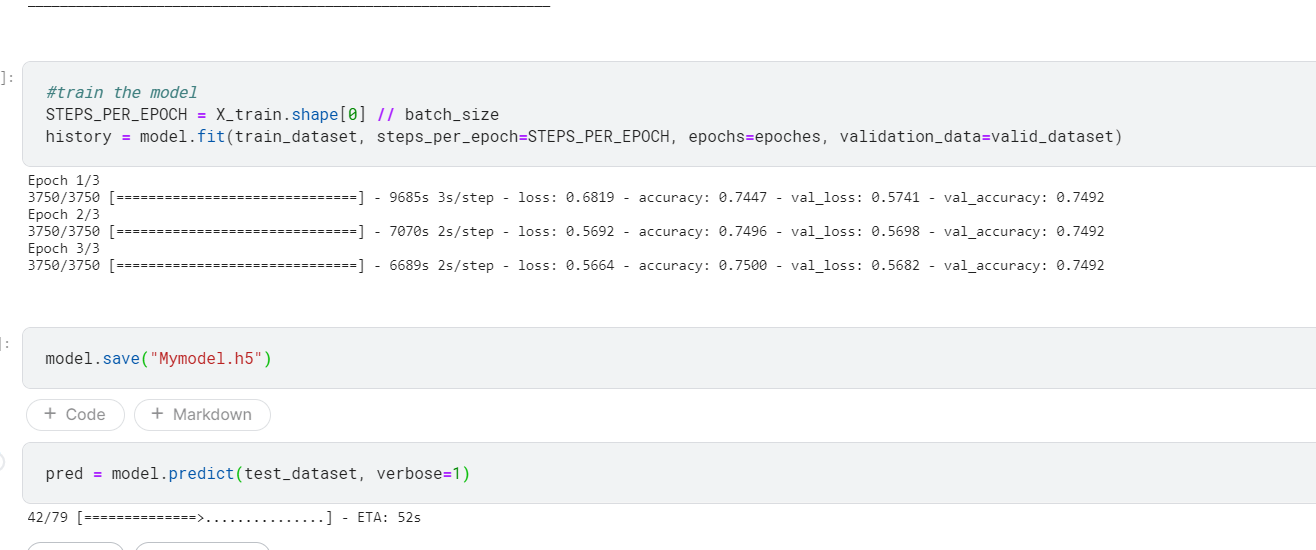

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/Model.h5')

In [ ]:
pred = model.predict(test_dataset, verbose=1)

In [ ]:
model.save("Model.h5")

In [ ]:
sample = sample_submission.copy()
sample["Label"] = pred
sample.to_csv("sample.csv", index=False)
sample.head()

<p dir="rtl"> 
این فایل نتیجه predict هایی هست که مدل برای پوشه تست انجام داده 
</p>

In [ ]:
sample = pd.read_csv('/content/my_sample.csv')

In [ ]:
sample.head()

,Id,Label
0,0001.jpg,0.810455
1,0002.jpg,0.705086
2,0003.jpg,0.786890
3,0004.jpg,0.663089
4,0005.jpg,0.781542


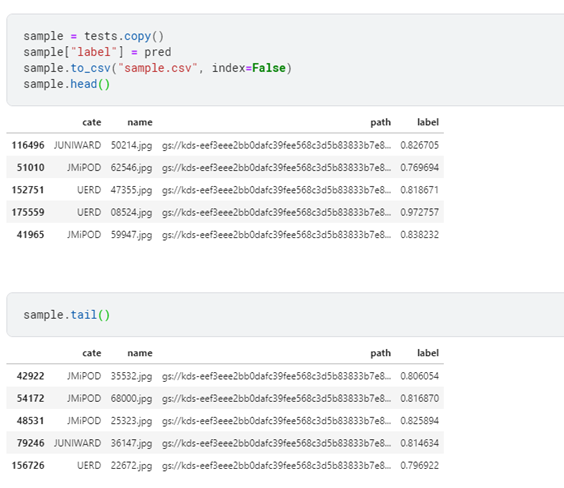

# CNN

<p dir="rtl"> 
</p>

<p dir="rtl"> 
محاسبه کسینوس شباهت : 
</p>

In [ ]:
def cosin_similariy(cover,stegano):
    
    shape = (weight*height*3)
    vec_cover = np.reshape(cover,shape)
    vec_stegano = np.reshape(stegano,shape)
    
    return 1 - spatial.distance.cosine(vec_cover,vec_stegano)

In [ ]:
classes[0]

'Cover'

In [ ]:
from tqdm import tqdm

<p dir="rtl"> 
این قسمت میام با توجه به id  هر عکس اون رو از هر 4 تا پوشه میخونیم و کسینوس های شباهت رو برای هر سه روش رمزنگاری محاسبه میکنیم و تو یک dataframe  مینویسیم.
</p>

In [ ]:
similarity = []
def label_images(cover,dirctory_classes):
    images = os.listdir(cover)
    for image in tqdm(images):
        cover_img = mpimg.imread(cover+"/"+image)
        JM_img = mpimg.imread(path_dictionary[classes[1]]+"/"+image)
        JU_img = mpimg.imread(path_dictionary[classes[2]]+"/"+image)
        UE_img = mpimg.imread(path_dictionary[classes[3]]+"/"+image)
        similarity.append({'image_id':image,classes[1]:cosin_similariy(cover_img,JM_img),
                          classes[2]:cosin_similariy(cover_img,JU_img),
                          classes[3]:cosin_similariy(cover_img,UE_img)})

In [ ]:
label_images(path_dictionary['Cover'],classes)

 37%|███▋      | 28023/75000 [20:29<37:32, 20.86it/s]/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 75000/75000 [56:45<00:00, 22.03it/s]


In [ ]:
train_temp = pd.DataFrame(similarity)
display(train_temp)

,image_id,UERD,JUNIWARD,JMiPOD
0,19743.jpg,1.003404,1.062289,1.005630
1,09405.jpg,1.016953,1.028913,1.003613
2,44834.jpg,1.104308,1.098887,1.096784
3,18143.jpg,1.000449,1.007558,1.019933
4,33502.jpg,1.068703,1.083842,1.077492
...,...,...,...,...
74995,26779.jpg,1.000949,1.005583,1.003030
74996,14543.jpg,1.001004,1.005301,1.003389
74997,77253.jpg,1.004031,1.005140,1.082335
74998,76050.jpg,1.003623,1.008141,1.007011


<p dir="rtl"> 
در مراحل آماد سازی دیتا برای تمام عکس ها این مقدار را محاسبه کرده و سپس  برای به دست آوردن احتمالات تابع softmax  اضافه شده 
</p>

In [ ]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [ ]:
train_temp['JMiPOD'] = train_temp['JMiPOD'].apply(lambda x:sigmoid(x))
train_temp['JUNIWARD'] = train_temp['JUNIWARD'].apply(lambda x:sigmoid(x))
train_temp['UERD'] = train_temp['UERD'].apply(lambda x:sigmoid(x))

In [ ]:
train_temp = df = pd.read_csv("/content/train_temp.csv")

In [ ]:
train_temp.head()

,image_id,UERD,JUNIWARD,JMiPOD
0,19743.jpg,0.731727,0.743128,0.732164
1,09405.jpg,0.734379,0.736705,0.731768
2,44834.jpg,0.751066,0.750052,0.749657
3,18143.jpg,0.731147,0.732542,0.734960
4,33502.jpg,0.744350,0.747220,0.746019


In [ ]:
train_imageids = pd.Series(os.listdir(path_dictionary['Cover'])).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir(path_dictionary['Test'])).sort_values(ascending=True).reset_index(drop=True)
cover_images_path = pd.Series(path_dictionary['Cover'] + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series(path_dictionary['JMiPOD']+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series(path_dictionary['JUNIWARD']+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series(path_dictionary['UERD']+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series(path_dictionary['Test']+test_imageids).sort_values(ascending=True)

In [ ]:
cover_images_path

0        /content/Cover/00001.jpg
1        /content/Cover/00002.jpg
2        /content/Cover/00003.jpg
3        /content/Cover/00004.jpg
4        /content/Cover/00005.jpg
                   ...           
74995    /content/Cover/80001.jpg
74996    /content/Cover/80002.jpg
74997    /content/Cover/80003.jpg
74998    /content/Cover/80004.jpg
74999    /content/Cover/80005.jpg
Length: 75000, dtype: object

<p dir="rtl"> 
تابع decode  و load  کردن برای یادگیری
<br>
به خاطر محدودیت حافظه  من فقط تونستم از 10000 تا از 75000 تا عکس موجود استفاده کنم . مسلماً در صورت وجود حافظه بیشتر میتوان از عکس های بیشتری استفاده کرد و دقت را تا حد بسیار خوبی افزایش داد . و دومین مورد چون حافظه محدود بود ناچارا اندازه عکس را از 512 به 300 تغییر دادم ولی فکر میکنم جوم ضرایب کسینویس را در dataframe  قید کردم مشکلی برای مدل پیش نخواهد آمد 
</p>

In [ ]:
def  decode_image(img):
    img = Image.open(img)
    img = img.convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    return img

In [ ]:
IMG_SIZE = 300
def load_training_data():
    train_data = []
    data_paths = [cover_images_path,JUNIWARD_images_path,JMIPOD_images_path,UERD_images_path]
    labels = [np.zeros(train_temp.shape[0]),train_temp['JMiPOD'],train_temp['JUNIWARD'],train_temp['UERD']]
    for i,image_path in enumerate(data_paths): 
        for j,img in enumerate(image_path[:10000]): 
            label = labels[i][j]
            img = decode_image(img)
            train_data.append([np.array(img), label])
    shuffle(train_data)
    return train_data

In [ ]:
train = load_training_data()

In [ ]:
display(train)

[[array([[ 74,  80,  87, ..., 156, 148, 146],
         [ 80,  93, 109, ..., 159, 149, 145],
         [ 87, 105, 116, ..., 152, 145, 142],
         ...,
         [ 98, 120, 133, ..., 140, 140, 136],
         [115, 126, 130, ..., 151, 146, 138],
         [124, 129, 126, ..., 136, 142, 143]], dtype=uint8),
  0.7134358898553069],
 [array([[167, 167, 167, ...,  55,  57,  58],
         [167, 167, 167, ...,  51,  45,  46],
         [168, 168, 168, ...,  47,  45,  57],
         ...,
         [111, 110, 108, ..., 102, 111, 105],
         [102, 101, 103, ...,  94, 100, 100],
         [106, 105, 104, ...,  36,  46,  52]], dtype=uint8),
  0.7298730396393115],
 [array([[232, 233, 231, ..., 222, 221, 222],
         [234, 232, 230, ..., 221, 222, 222],
         [233, 231, 234, ..., 220, 221, 222],
         ...,
         [ 57,  35,  41, ..., 131, 112,  97],
         [ 93,  86,  54, ...,  80, 107,  94],
         [ 57,  57,  44, ...,  54,  64,  86]], dtype=uint8),
  0.7099603484911288],
 [array([[133, 1

In [ ]:
test_images_path = pd.Series(path_dictionary['Test']+test_imageids).sort_values(ascending=True)
def load_test_data():
    test_data = []
    for img in test_images_path:
        img = Image.open(img.replace('','/content/'))
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img)])
            
    return test_data

In [ ]:
len(train)

40000

In [ ]:
trainImages = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train])

# Modeling

import libraries

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from  tensorflow.keras.layers.normalization import BatchNormalization
from  tensorflow.keras.layers import BatchNormalization

<p dir="rtl"> 
توضیح CNN
<br>
لایه ی کانولوشن
<br>
لایه کانولوشن هسته اصلی CNN است. این بخش اصلی بار محاسباتی شبکه را حمل می کند. این لایه یک محصول نقطه ای بین دو ماتریس را انجام می دهد ، جایی که یک ماتریس مجموعه ای از پارامترهای قابل یادگیری است که در غیر این صورت به عنوان هسته شناخته می شود ، و ماتریس دیگر قسمت محدود شده میدان پذیرش است. هسته از نظر فضایی کوچکتر از یک تصویر است اما عمق بیشتری دارد. این بدان معناست که اگر تصویر از سه کانال (RGB) تشکیل شده باشد ، ارتفاع و عرض هسته از نظر فضایی کوچک خواهد بود ، اما عمق آن تا هر سه کانال گسترش می یابد.
<br>
در طول forward pass ، هسته بر روی ارتفاع و عرض تصویر می لغزد و نمایانگر تصویر آن ناحیه پذیرنده را تولید می کند. این یک نمایش دو بعدی از تصویر ایجاد می کند که به عنوان نقشه فعال سازی شناخته می شود و پاسخ هسته را در هر موقعیت مکانی تصویر نشان می دهد. اندازه کشویی هسته را گام به گام می نامند.

---
</p>

<p dir="rtl"> 
لایه ی pooling
<br>
لایه جمع آوری خروجی شبکه را در مکانهای خاص با استخراج یک آمار خلاصه از خروجی های نزدیک جایگزین می کند. این به کاهش اندازه فضایی نمایش کمک می کند ، که مقدار محاسبه و وزن مورد نیاز را کاهش می دهد. عملیات جمع آوری در هر بخش از نمایندگی به صورت جداگانه پردازش می شود.

---
</p>

<p dir="rtl"> 
لایه ی Fully Connected
<br>
نورونهای این لایه ارتباط کاملی با همه نورونهای لایه قبلی و بعدی دارند که در FCNN معمولی مشاهده می شود. به همین دلیل است که می توان آن را به طور معمول با ضرب ماتریس و سپس اثر سوگیری محاسبه کرد. لایه FC به ترسیم نمای بین ورودی و خروجی کمک می کند.

---
</p>

<p dir="rtl"> 
ReLU
<br>
واحد خطی تصحیح شده (ReLU). این تابع ƒ (κ) = حداکثر (0 ، κ) را محاسبه می کند. به عبارت دیگر ، فعال سازی به سادگی آستانه صفر است. در مقایسه با sigmoid و tanh ، ReLU قابل اطمینان تر است و همگرایی را شش برابر سرعت می بخشد. متأسفانه ، یک نکته منفی این است که ReLU می تواند در طول تمرین شکننده باشد. شیب بزرگی که از آن عبور می کند می تواند آن را به گونه ای به روز کند که نورون هرگز بیشتر به روز نشود. با این حال ، ما می توانیم با تعیین نرخ یادگیری مناسب با این کار کنیم.

---
</p>


<p dir="rtl"> 
مدل 
<br>
 در اینجا مدل ما از 5 لایه کانولوشن تشکیل شده است که در هر لایه از اندازه کرنل 3*3 استفاده شده است و از activaton function ،  relu برای همه لایه ها استفاده شده .در اولین لایه یک ورودی به  مدل میدهیم که مشخصات و اندازه ط.ول و عرض عکس و تعداد کانال های رنگی عکس هست. برای قسمت pooling  از maxpooling  استفاده کردیم و  بعد در هر لایه از batchnormalization  استفاده شده که نرمال سازی دسته ای تکنیکی برای آموزش شبکه های عصبی بسیار عمیق است که ورودی های یک لایه را برای هر مینی دسته استاندارد می کند. این امر باعث تثبیت فرایند یادگیری و کاهش چشمگیر تعداد دوره های آموزشی مورد نیاز برای آموزش شبکه های عمیق می شود.
 بعد از انجام هر پنج لایه میایم 0.2 داده ها رو دور میرزیم و flattern  انجام میدیم  flatten کردن  ، تبدیل داده ها به یک آرایه 1 بعدی برای ورود آنها به لایه بعدی است. ما خروجی لایه های پیچشی را صاف می کنیم تا یک بردار ویژگی بلند ایجاد کنیم. و به مدل طبقه بندی نهایی متصل می شود ، که یک لایه کاملاً متصل نامیده می شود. مرحله بعدی dense  هست که لایه متراکم یک لایه شبکه عصبی است که عمیقاً به هم متصل شده است ، به این معنی که هر نورون در لایه متراکم ورودی را از همه نورونهای لایه قبلی خود دریافت می کند.در پس زمینه ، لایه متراکم ضرب ماتریس-بردار را انجام می دهد. مقادیر مورد استفاده در ماتریس در واقع پارامترهایی هستند که می توان با کمک backpropagation آموزش و به روز کرد. خروجی تولید شده توسط لایه متراکم یک بردار ابعادی ‘m’ است. بنابراین ، لایه متراکم اساساً برای تغییر ابعاد بردار استفاده می شود. لایه های متراکم همچنین عملیات مانند چرخش ، مقیاس بندی ، ترجمه بر روی بردار را اعمال می کند.
</p>

In [ ]:
with strategy.scope():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        3

In [ ]:
#train the model
history = model.fit(trainImages, trainLabels, batch_size = batch_size, epochs = 3 , verbose = 1)

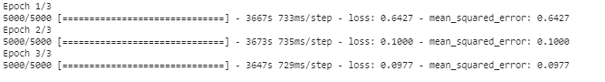

In [ ]:
model.save("Model.h5")

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./Model.h5')

In [ ]:
test = load_test_data()
testImages = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
predict = model.predict(testImages,batch_size=100)

In [ ]:
ss = sample_submission.copy()
ss['Label'] = predict

In [ ]:
ss.to_csv('submission.csv',index=True)

In [ ]:
ss.head()

In [ ]:
ss.value_counts()

In [ ]:
df_new = ss[ss['Label'] < 0.50]
display(df_new)

In [ ]:
df_new = ss[ss['Label'] > 0.50]
display(df_new)

In [ ]:
print(classification_report(predict, target_names = ['Cover', 'JMiPOD', 'JUNIWARD', 'UERD']))

# K-Fold cross validation

import librarie

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
        print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
        cnt += 1

In [ ]:
algorithms = ['Cover', 'JMiPOD', 'JUNIWARD', 'UERD']
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = set_seed()
numpy.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(train_dataset, steps_per_epoch=STEPS_PER_EPOCH, epochs=1, validation_data=valid_dataset)
    # evaluate the model
    scores = model.evaluate(X, y, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))